Clustering Problem: use dataset – Clustering

Load the data
Perform exploratory analysis: Visualize the relationship between Annual Income and Spending Score.
Determine the optimal number of clusters using the Elbow Method.
Apply K-Means clustering to group the customers.
Add the cluster labels to the original dataset.
Analyze which cluster corresponds to high-value customers (high income & high score).



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('customer.csv')

In [3]:
df.head()

,customer_id,age,income,purchase_amount,gender,region,total_purchases,preferred_product_category,customer_loyalty_score,signup_date,last_purchase_date
0,1,56.0,67700.0,1019.145669,Female,South,31.0,Toys,12.501082,2022-05-01,2022-02-27
1,2,69.0,50200.0,252.214693,Male,North,27.0,Toys,14.402036,2022-03-14,2022-07-03
2,3,46.0,84000.0,354.742321,Male,East,25.0,Clothing,89.085761,2022-07-17,2022-04-13
3,4,32.0,42700.0,716.573913,Male,West,5.0,Electronics,98.800804,2022-07-09,2021-04-21
4,5,60.0,112300.0,1528.118235,Female,West,6.0,Clothing,28.893785,2021-04-21,2021-06-02


In [4]:
df.describe()

,customer_id,age,income,purchase_amount,total_purchases,customer_loyalty_score
count,3526.000000,3520.000000,3.520000e+03,3520.000000,3520.000000,3521.000000
mean,1738.398469,49.116477,7.469136e+04,1358.011839,33.310227,62.114247
std,1005.277859,20.667920,1.910293e+05,10258.540297,264.613324,359.620617
min,1.000000,-20.000000,-5.000000e+04,-10000.000000,-1000.000000,-999.000000
25%,867.250000,33.000000,4.410000e+04,515.449662,13.000000,24.275087
50%,1739.500000,49.000000,6.950000e+04,1008.401544,24.000000,49.629709
75%,2608.750000,64.000000,9.590000e+04,1494.622453,37.000000,74.338581
max,3476.000000,500.000000,9.999999e+06,500000.000000,10000.000000,15000.000000


In [5]:
df.dtypes

customer_id                     int64
age                           float64
income                        float64
purchase_amount               float64
gender                         object
region                         object
total_purchases               float64
preferred_product_category     object
customer_loyalty_score        float64
signup_date                    object
last_purchase_date             object
dtype: object

In [6]:
print("Missing values: ",df.isna().sum())
print("Duplicates: ",df.duplicated().sum())

Missing values:  customer_id                   0
age                           6
income                        6
purchase_amount               6
gender                        7
region                        6
total_purchases               6
preferred_product_category    8
customer_loyalty_score        5
signup_date                   6
last_purchase_date            6
dtype: int64
Duplicates:  50


In [7]:
df['age'] = pd.to_numeric(df['age'], errors='coerce')
df['income'] = pd.to_numeric(df['income'], errors='coerce')
df.drop_duplicates(inplace=True)




In [8]:
dup_customerid = df["customer_id"].duplicated(keep=False).sum()
dup_rows = int(df.duplicated(keep=False).sum())
print(dup_customerid)
print(dup_rows)

0
0


In [9]:
df = df[(df["age"] >= 18) & (df["age"] <= 80)]

In [10]:
df.describe()

,customer_id,age,income,purchase_amount,total_purchases,customer_loyalty_score
count,3460.000000,3460.000000,3.454000e+03,3454.000000,3454.000000,3455.000000
mean,1738.265029,48.741040,7.467588e+04,1365.795748,33.529820,62.018838
std,1003.579677,17.957307,1.928038e+05,10355.714590,267.118875,362.668217
min,1.000000,18.000000,-5.000000e+04,-10000.000000,-1000.000000,-999.000000
25%,868.750000,33.000000,4.400000e+04,514.387051,13.000000,24.138323
50%,1738.500000,49.000000,6.930000e+04,1008.880715,24.000000,49.472350
75%,2606.250000,64.000000,9.577500e+04,1496.476759,37.000000,74.368876
max,3476.000000,79.000000,9.999999e+06,500000.000000,10000.000000,15000.000000


In [11]:
print(df["region"].value_counts()) 

region
West        897
South       889
North       836
East        822
Invalid       1
Unknown       1
Space         1
Void          1
Moon          1
Pluto         1
123           1
Atlantis      1
Test          1
Mars          1
Name: count, dtype: int64


In [12]:
valid_regions = ["North", "South", "East", "West"]
df = df[df["region"].isin(valid_regions)]


In [13]:
print(df["region"].value_counts()) 

region
West     897
South    889
North    836
East     822
Name: count, dtype: int64


In [14]:
df.shape

(3444, 11)

In [15]:
df.dropna(inplace=True)

In [16]:
df.shape

(3396, 11)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3396 entries, 0 to 3475
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customer_id                 3396 non-null   int64  
 1   age                         3396 non-null   float64
 2   income                      3396 non-null   float64
 3   purchase_amount             3396 non-null   float64
 4   gender                      3396 non-null   object 
 5   region                      3396 non-null   object 
 6   total_purchases             3396 non-null   float64
 7   preferred_product_category  3396 non-null   object 
 8   customer_loyalty_score      3396 non-null   float64
 9   signup_date                 3396 non-null   object 
 10  last_purchase_date          3396 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 318.4+ KB


In [18]:
df['signup_date'] = pd.to_datetime(df['signup_date'],errors='coerce')

In [19]:
df['last_purchase_date'] = pd.to_datetime(df['last_purchase_date'],errors='coerce')

In [20]:
df['preferred_product_category'].value_counts()

preferred_product_category
Clothing         715
Electronics      706
Home & Garden    660
Health           658
Toys             649
Test               1
Invalid            1
Alien              1
Unknown            1
Food               1
Null               1
999                1
Space              1
Name: count, dtype: int64

In [21]:
valid_product_categories = ['Clothing','Electronics','Home & Garden','Health','Toys']
df = df[df['preferred_product_category'].isin(valid_product_categories)]

In [22]:
df.shape

(3388, 11)

In [23]:
df = df[(df["income"] >= 20000) & (df["income"] <= 120000)]

In [24]:
df["income"] = df["income"].round(-2)


In [25]:
df = df[(df["purchase_amount"] >= 20) & (df["purchase_amount"] <= 20000)]

In [26]:
df['gender'].value_counts()

gender
Male          1706
Female        1648
Non-binary       1
Null             1
Unknown          1
123              1
0                1
                 1
999              1
Invalid          1
Alien            1
Name: count, dtype: int64

In [27]:
valid_gender = ['Male','Female']
df = df[df['gender'].isin(valid_gender)]

In [28]:
df['gender'].value_counts()

gender
Male      1706
Female    1648
Name: count, dtype: int64

In [29]:
df.shape

(3354, 11)

In [30]:
df = df[(df['total_purchases'] >= 1) & (df['total_purchases'] <= 50)]

In [31]:
df = df[(df['customer_loyalty_score'] >= 0) & (df['customer_loyalty_score'] <= 100)]

In [32]:
mask_signup = (df["signup_date"] >= "2021-01-01") & (df["signup_date"] <= "2022-12-31")
invalid_signup = df[~mask_signup]
print(f"Invalid signup dates: {len(invalid_signup)}")


Invalid signup dates: 0


In [33]:
invalid_order = df[df["last_purchase_date"] < df["signup_date"]]
print(f"Rows where last_purchase_date < signup_date: {len(invalid_order)}")


Rows where last_purchase_date < signup_date: 1093


In [34]:
df.to_csv('cleaned_data.csv')

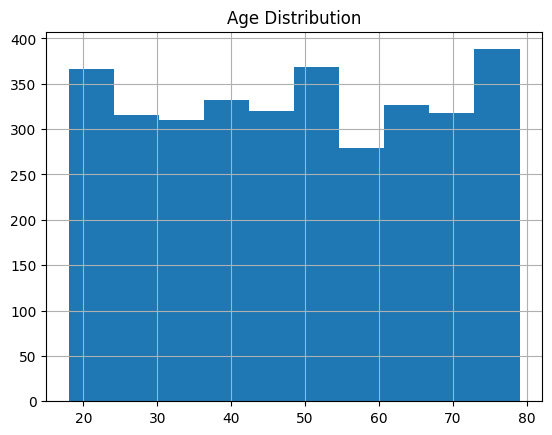

In [35]:
df["age"].hist()
plt.title("Age Distribution")
plt.show()

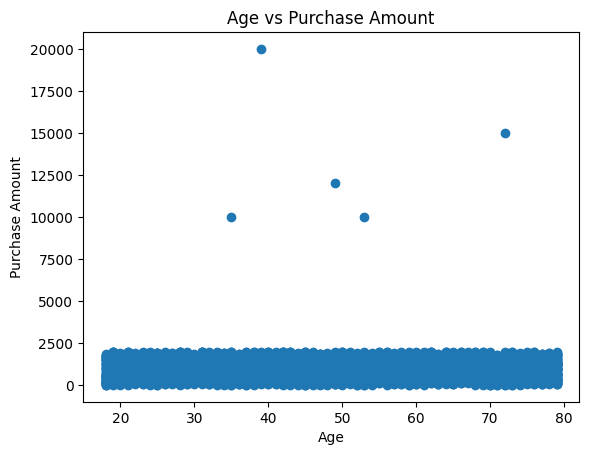

In [36]:
plt.scatter(df["age"], df["purchase_amount"])
plt.xlabel("Age")
plt.ylabel("Purchase Amount")
plt.title("Age vs Purchase Amount")
plt.show()


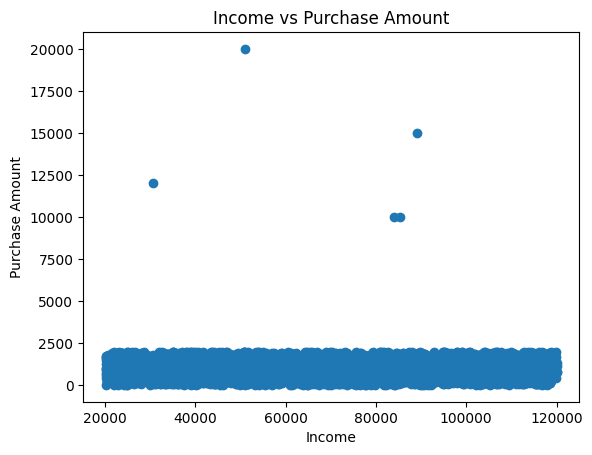

In [37]:
plt.scatter(df['income'],df['purchase_amount'])
plt.xlabel("Income")
plt.ylabel("Purchase Amount")
plt.title("Income vs Purchase Amount")
plt.show()

In [38]:
corr = df.drop(columns='customer_id').select_dtypes(include=["number"]).corr()
corr

,age,income,purchase_amount,total_purchases,customer_loyalty_score
age,1.000000,0.010011,0.003662,0.007143,0.008750
income,0.010011,1.000000,0.007813,0.013663,-0.011080
purchase_amount,0.003662,0.007813,1.000000,0.002888,0.016265
total_purchases,0.007143,0.013663,0.002888,1.000000,-0.009995
customer_loyalty_score,0.008750,-0.011080,0.016265,-0.009995,1.000000


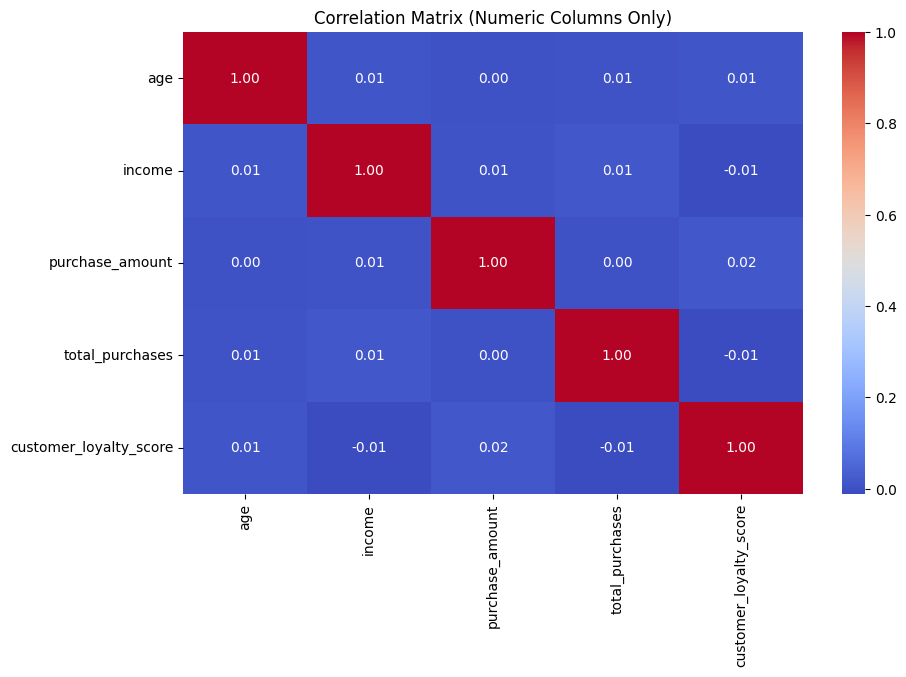

In [39]:
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix (Numeric Columns Only)")
plt.show()

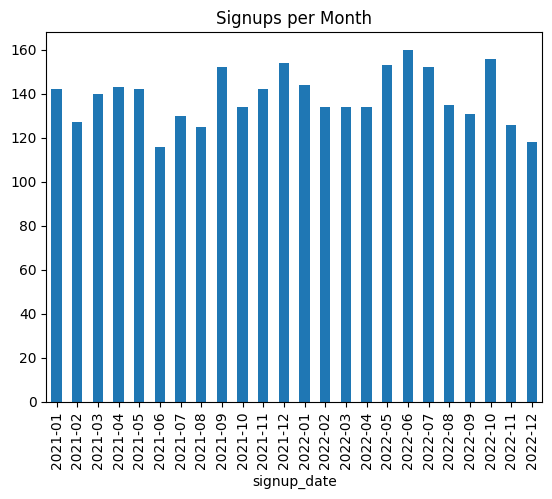

In [40]:
monthly_signups = df.groupby(df["signup_date"].dt.to_period("M")).size()
monthly_signups.plot(kind="bar")
plt.title("Signups per Month")
plt.show()


In [ ]:
# Clustering Problem: use dataset – Clustering

# Load the data
# Perform exploratory analysis: Visualize the relationship between Annual Income and Spending Score.
# Determine the optimal number of clusters using the Elbow Method.
# Apply K-Means clustering to group the customers.
# Add the cluster labels to the original dataset.
# Analyze which cluster corresponds to high-value customers (high income & high score).

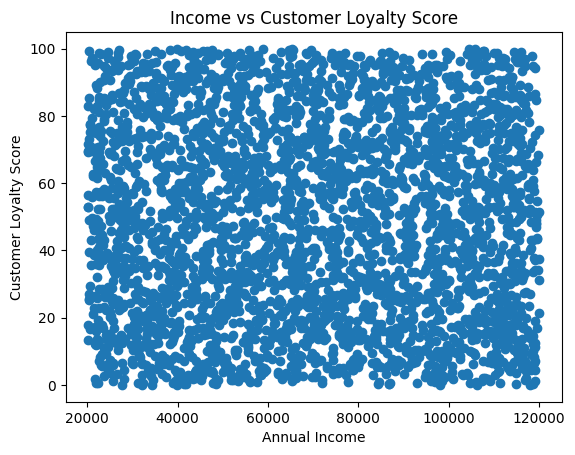

In [43]:
# #relationship between Annual Income and Spending Score.
plt.scatter(df['income'], df['customer_loyalty_score'])
plt.xlabel('Annual Income')
plt.ylabel('Customer Loyalty Score')
plt.title('Income vs Customer Loyalty Score')
plt.show()



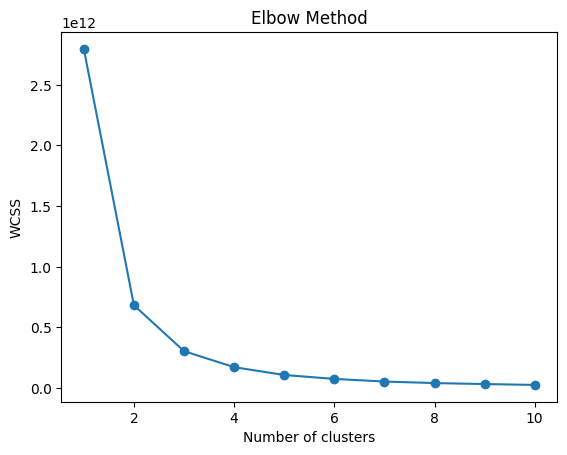

In [44]:
# Determine the optimal number of clusters using the Elbow Method.
from sklearn.cluster import KMeans
X = df[['income', 'customer_loyalty_score']]
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


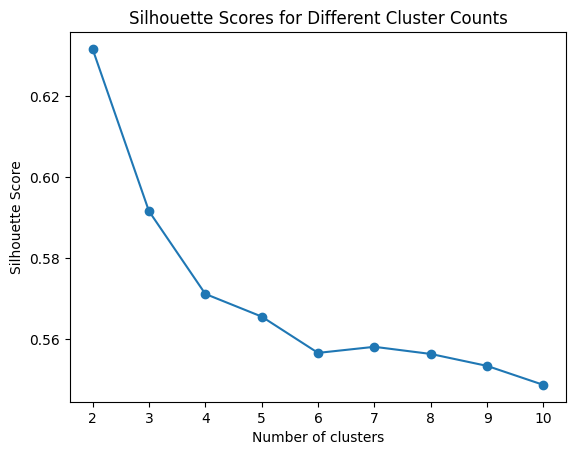

In [52]:
# Determine silhouette score for different cluster counts
from sklearn.metrics import silhouette_score
silhouette_scores = []
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Scores for Different Cluster Counts')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()


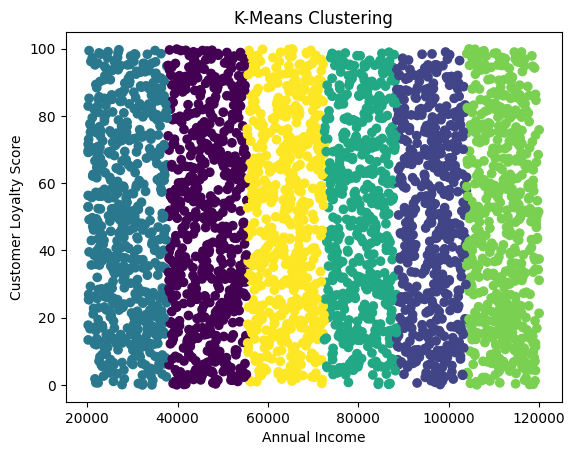

                income  customer_loyalty_score
Cluster                                       
0         46472.875817               49.993995
1         96184.063745               49.057337
2         28893.231810               49.157646
3         80638.596491               50.133632
4        111711.050725               48.340818
5         64078.158845               49.558468


In [50]:
# Apply K-Means clustering to group the customers.
kmeans = KMeans(n_clusters=6, random_state=42)
kmeans.fit(X)
labels = kmeans.labels_
df['Cluster'] = labels
# Apply K-Means clustering to group the customers.
df.head()
plt.scatter(df['income'], df['customer_loyalty_score'], c=df['Cluster'], cmap='viridis')
plt.xlabel('Annual Income')
plt.ylabel('Customer Loyalty Score')
plt.title('K-Means Clustering')
plt.show()
# Analyze which cluster corresponds to high-value customers (high income & high score).
cluster_summary = df.groupby('Cluster')[['income', 'customer_loyalty_score']].mean()
print(cluster_summary)


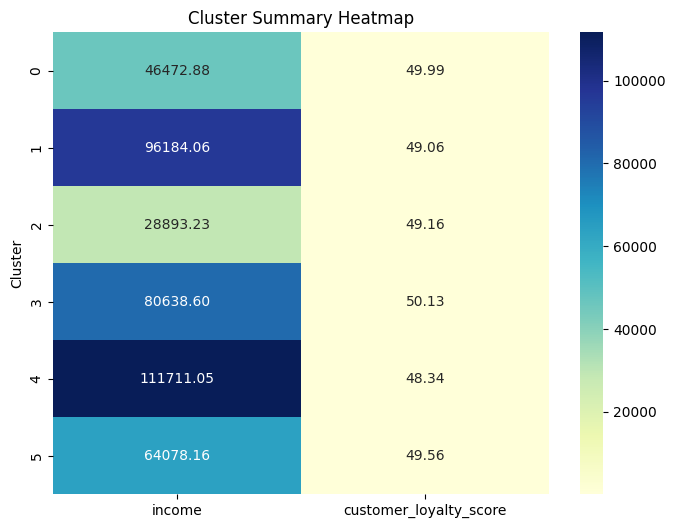

In [51]:
# Add the cluster summary heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cluster_summary, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title('Cluster Summary Heatmap')
plt.show()